`Chapter 5 -- Equation Solving`

In [1]:
from scipy import linalg as la
from scipy import optimize

import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

Square systems

In [2]:
A = sympy.Matrix([[2,3],[5,4]])
b = sympy.Matrix([4,3])

A.rank()

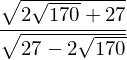

In [5]:
A.condition_number()

In [6]:
sympy.N(_)

In [7]:
A.norm()

In [8]:
A = np.array([[2,3],[5,4]])
b = np.array([4,3])
np.linalg.matrix_rank(A)

2

In [9]:
np.linalg.cond(A)

In [10]:
np.linalg.norm(A)

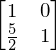

In [11]:
A = sympy.Matrix([[2,3],[5,4]])
b = sympy.Matrix([4,3])

L,U, _ = A.LUdecomposition()
L

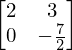

In [12]:
U

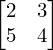

In [14]:
L*U

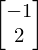

In [15]:
x = A.solve(b); x # same as A.LUsolve(b)

In [16]:
P,L,U = la.lu(A)
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [17]:
U

array([[5. , 4. ],
       [0. , 1.4]])

In [18]:
L*U

array([[5. , 0. ],
       [0. , 1.4]])

In [20]:
A = sympy.Matrix([[2,3],[5,4]])
b = sympy.Matrix([4,3])

la.solve(A,b)

ValueError: object arrays are not supported

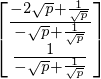

In [22]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1,sympy.sqrt(p)],[1,1/sympy.sqrt(p)]])
b = sympy.Matrix([1,2])
x = A.solve(b)
x

Text(0.5, 0, '$x$')

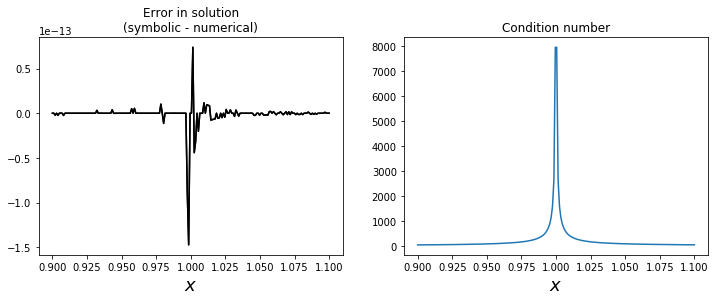

In [26]:
# Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1,sympy.sqrt(p)],[1,1/sympy.sqrt(p)]])
b = sympy.Matrix([1,2])

# Solve symbolically
x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify()

# Numerical problem specification
AA = lambda p: np.array([[1,np.sqrt(p)],[1,1/np.sqrt(p)]])
bb = np.array([1,2])
x_num_sol = lambda p: np.linalg.solve(AA(p),bb)

# Graph the difference between the symbolic (exact) and numerical results.
fig, axes = plt.subplots(1,2,figsize=(12,4))

p_vec = np.linspace(0.9,1.1,200)
for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p,pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(symbolic - numerical)")
axes[0].set_xlabel(r'$x$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p,pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$x$', fontsize=18)

Rectangular systems

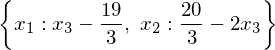

In [27]:
x_vars = sympy.symbols("x_1, x_2, x_3")
A = sympy.Matrix([[1,2,3],[4,5,6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7,8])
sympy.solve(A*x - b, x_vars)

In [28]:
# define true model parameters
x = np.linspace(-1,1,100)
a,b,c = 1,2,3
y_exact = a+b*x+c*x**2
y_exact

array([2.        , 1.92041628, 1.8432813 , 1.76859504, 1.69635751,
       1.62656872, 1.55922865, 1.49433731, 1.4318947 , 1.37190083,
       1.31435568, 1.25925926, 1.20661157, 1.15641261, 1.10866238,
       1.06336088, 1.02050811, 0.98010407, 0.94214876, 0.90664218,
       0.87358433, 0.84297521, 0.81481481, 0.78910315, 0.76584022,
       0.74502602, 0.72666054, 0.7107438 , 0.69727579, 0.6862565 ,
       0.67768595, 0.67156413, 0.66789103, 0.66666667, 0.66789103,
       0.67156413, 0.67768595, 0.6862565 , 0.69727579, 0.7107438 ,
       0.72666054, 0.74502602, 0.76584022, 0.78910315, 0.81481481,
       0.84297521, 0.87358433, 0.90664218, 0.94214876, 0.98010407,
       1.02050811, 1.06336088, 1.10866238, 1.15641261, 1.20661157,
       1.25925926, 1.31435568, 1.37190083, 1.4318947 , 1.49433731,
       1.55922865, 1.62656872, 1.69635751, 1.76859504, 1.8432813 ,
       1.92041628, 2.        , 2.08203245, 2.16651362, 2.25344353,
       2.34282216, 2.43464953, 2.52892562, 2.62565044, 2.72482

In [29]:
# simulate noisy data
m = 100
X = 1-2*np.random.rand(m)
Y = a+b*X+c*X**2+np.random.randn(m)
Y

array([ 5.28733046,  0.67773194,  4.08936195,  6.31124478,  1.14106272,
        2.34771951,  0.05387468,  3.49432276,  3.17756855,  2.8753688 ,
        3.54727801,  3.3920937 ,  5.97904846,  0.98929747,  5.94725013,
        5.91739729,  5.84297911,  2.63692905, -0.21644795,  3.13179687,
       -0.87046524,  3.85654844,  1.3781316 ,  1.73331977,  6.98511215,
        4.40470763,  2.65275486, -1.27519243,  0.98302491,  3.74814789,
        1.3932115 ,  0.828808  ,  3.33925983,  0.24606731,  2.22096011,
        1.51337999,  1.24962906,  3.61589888,  1.0499835 ,  2.24861403,
        1.10234637,  1.7956568 ,  3.03112748,  5.76205138,  3.54727381,
        2.62046909,  3.61914501,  3.44898813,  1.11979827,  1.07674089,
        1.01443615,  1.8479725 ,  0.2239137 ,  0.47627143,  5.35202095,
       -0.10958539,  3.71132279,  5.39576158,  1.33029836, -0.26384224,
        0.74730082,  6.95272611,  2.15533986,  4.29450146,  0.44875924,
        0.91195161,  4.75454737, -0.36531771,  0.73514366,  3.54

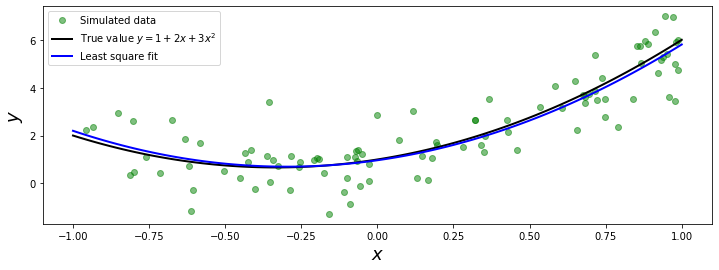

In [33]:
# fit the data to the model using linear least square
A = np.vstack([X**0, X**1, X**2])
sol, r, rank, s = la.lstsq(A.T, Y)

y_fit = sol[0] + sol[1]*x + sol[2]*x**2
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(X,Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x,y_exact,'k',lw=2,label='True value $y = 1+2x+3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.legend(loc=2)
plt.show()

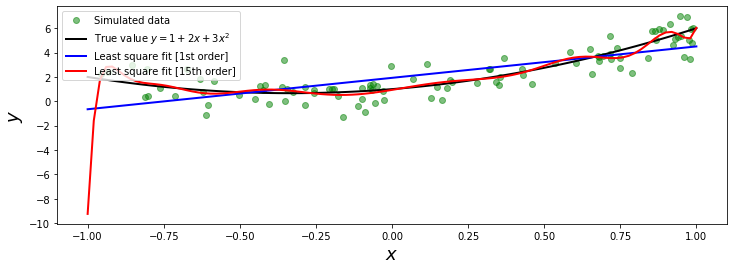

In [37]:
# fit the data to the model using linear least square:
# 1st order polynomial
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s*x**n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s*x**n for n,s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(X,Y,'go', alpha=0.5, label='Simulated data')
ax.plot(x,y_exact,'k',lw=2,label='True value $y = 1+2x+3x^2$')
ax.plot(x,y_fit1,'b',lw=2,label='Least square fit [1st order]')
ax.plot(x,y_fit15,'r',lw=2,label='Least square fit [15th order]')
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.legend(loc=2)
plt.show()

Eigenvalue problems

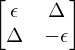

In [38]:
eps, delta = sympy.symbols("epsilon,Delta")
H = sympy.Matrix([[eps,delta],[delta,-eps]])
H

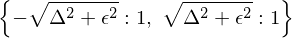

In [39]:
H.eigenvals()

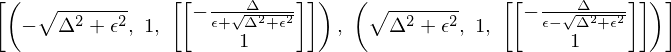

In [40]:
H.eigenvects()

In [41]:
(eval1,_,evec1),(eval2,_,evec2) = H.eigenvects()
sympy.simplify(evec1[0].T*evec2[0])

In [42]:
A = np.array([[1,3,5],[3,5,3],[5,3,9]])
evals,evecs = la.eig(A)
evals

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [43]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [44]:
la.eigvalsh(A)

array([-1.75902942,  3.40592034, 13.35310908])